In [ ]:
#cargamos los datos
import pandas as pd
data = pd.read_csv("/content/Maternal_Health_Risk_Data_Set.csv")
#eliminamos una columna que son los identificadores de los pacientes, ya que es informacion redundante
del data['Unnamed: 0']
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [ ]:
#pondremos las variables predictores y la objetivos cada una por un lado. La variable dependiente sera el nivel
# de riego que sera alto y bajo. 
colnames = data.columns.values.tolist()
predictors = colnames[:6]
target = colnames[6]
target

'RiskLevel'

In [ ]:
#entrenaremos y validaremos

import numpy as np
data['is_train'] = (np.random.uniform(0,1,len(data)) <= 0.75).astype(int)

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 748.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

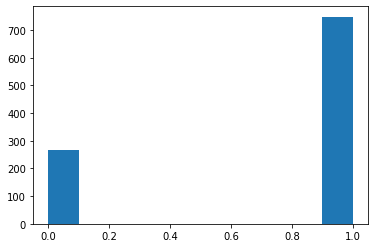

In [ ]:
import matplotlib.pyplot as plt

train, test = data[data["is_train"]==True], data[data["is_train"]==False]
plt.hist(data.is_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
arbol.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [ ]:
# Guardamos los predicciones
preds = arbol.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,0,1
Actual,,
0,109,17
1,13,127


In [ ]:
# Visualizar el arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import export_graphviz
#exportamos el arbol creado en archivo dot
tree.export_graphviz(arbol,
                     out_file="tree.dot",
                     feature_names = predictors)



In [ ]:
#cargamos el archivo dot 
file = open("/content/tree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="BS <= 8.5\\nentropy = 0.954\\nsamples = 748\\nvalue = [280, 468]"] ;\n1 [label="SystolicBP <= 129.5\\nentropy = 1.0\\nsamples = 566\\nvalue = [276, 290]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="BodyTemp <= 99.5\\nentropy = 0.993\\nsamples = 502\\nvalue = [276, 226]"] ;\n1 -> 2 ;\n3 [label="BS <= 7.005\\nentropy = 0.956\\nsamples = 405\\nvalue = [252, 153]"] ;\n2 -> 3 ;\n4 [label="DiastolicBP <= 49.5\\nentropy = 1.0\\nsamples = 230\\nvalue = [117, 113]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 9\\nvalue = [9, 0]"] ;\n4 -> 5 ;\n6 [label="BS <= 6.75\\nentropy = 1.0\\nsamples = 221\\nvalue = [108, 113]"] ;\n4 -> 6 ;\n7 [label="DiastolicBP <= 75.0\\nentropy = 0.971\\nsamples = 60\\nvalue = [36, 24]"] ;\n6 -> 7 ;\n8 [label="HeartRate <= 68.0\\nentropy = 1.0\\nsamples = 47\\nvalue = [23, 24]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.0\\nsamples = 5\\nval

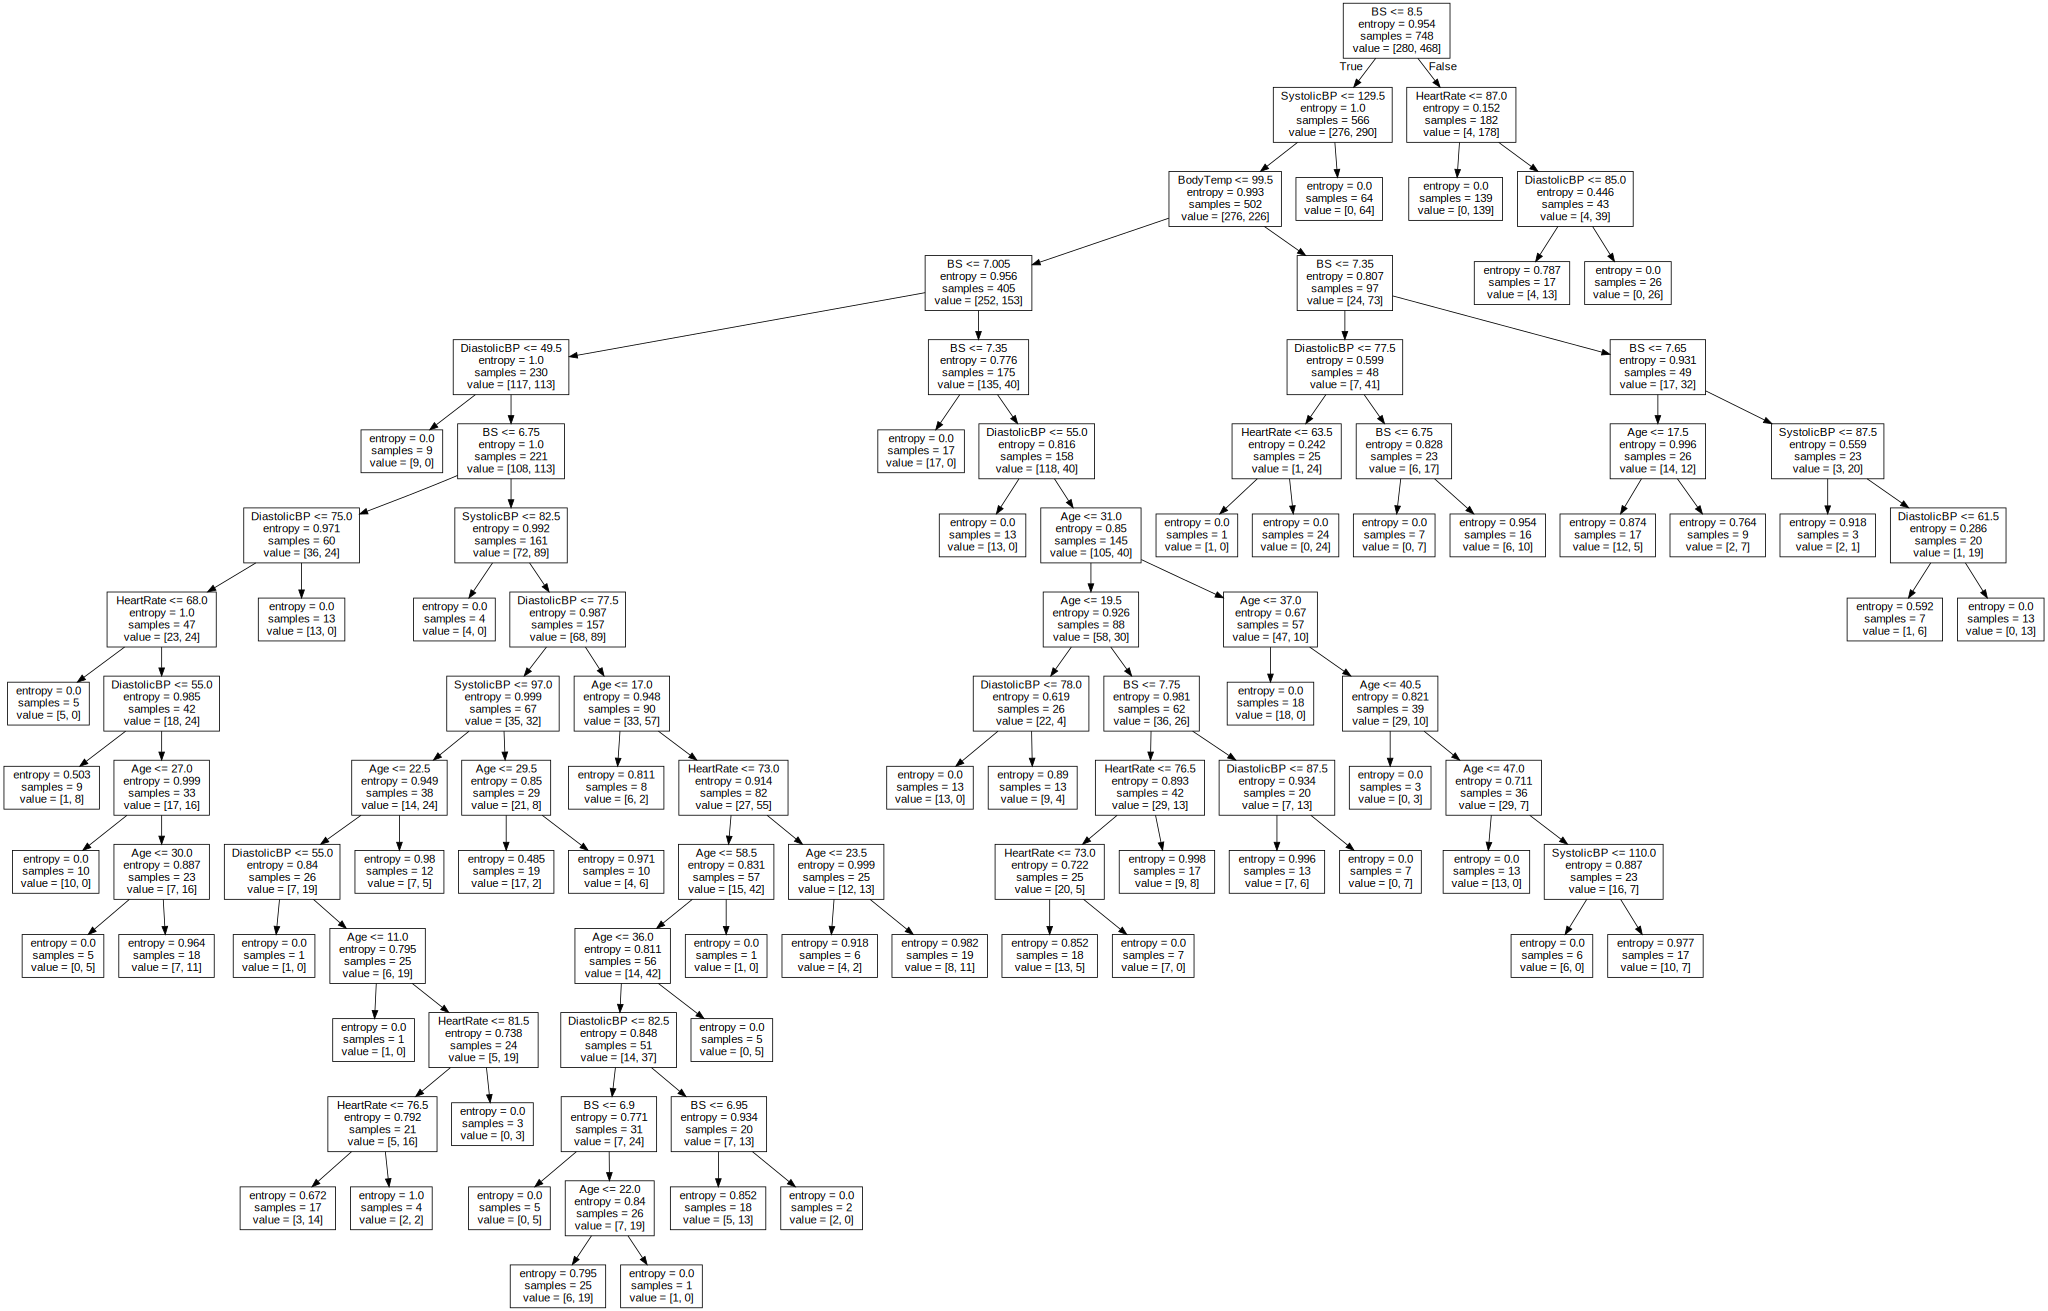

In [ ]:
# visualizamos el archivo
import graphviz
graphviz.Source(text)

**Validacion cruzada en un arbol de clasficacion **

In [ ]:
X = data[predictors]
Y = data[target]

In [ ]:
#Para combatir el overfitting, lo mejor es podar el arbol
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits= X.shape[0], shuffle=True, random_state=1)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# aqui obtenemos el promedios de la eficacia para cada fold
score = np.mean(scores)
score

0.7859960552268245

In [ ]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits= X.shape[0], shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.626232741617357
    [0. 0. 0. 1. 0. 0.]
Score para i =  2  es de  0.7080867850098619
    [0.         0.32200428 0.         0.67799572 0.         0.        ]
Score para i =  3  es de  0.772189349112426
    [0.         0.27181827 0.02077029 0.57232663 0.13508481 0.        ]
Score para i =  4  es de  0.772189349112426
    [0.         0.23481075 0.03314717 0.6153488  0.11669328 0.        ]
Score para i =  5  es de  0.7859960552268245
    [0.         0.23017601 0.05490594 0.58959887 0.12531918 0.        ]
Score para i =  6  es de  0.8027613412228797
    [0.03136029 0.20912879 0.07023857 0.56122051 0.11386004 0.01419181]
Score para i =  7  es de  0.8195266272189349
    [0.02580351 0.19527392 0.10981463 0.5318224  0.10631676 0.03096878]
Score para i =  8  es de  0.8284023668639053
    [0.03927823 0.20730151 0.10432047 0.50521467 0.1009976  0.04288752]
Score para i =  9  es de  0.7928994082840237
    [0.06969455 0.20598055 0.10741167 0.48498596 0.09615022 0.03577704

Arboles de regresion

In [ ]:
#Intentaremos predecir la votacion de Trump en las elecciones del 2016

In [ ]:
import pandas as pd

votacion = pd.read_csv('/content/votaciones_usa.csv')
del votacion['Unnamed: 0']
votacion.head() 

,votacion_trump,homicidios,crimen_violento,desempleo,blancos,hispanos,afros
0,6733,7.65,254.24,0.076,75.20,1.35,22.50
1,10732,6.67,227.97,0.081,77.20,1.70,11.75
2,31579,5.31,183.47,0.064,87.60,1.80,8.65
3,7681,6.76,410.17,0.070,58.05,1.95,36.65
4,5224,6.67,449.40,0.094,46.00,1.05,52.15


In [ ]:
#escalaremos los datos
import sklearn
from sklearn.model_selection import train_test_split
scale_vars = ['votacion_trump',	'homicidios','crimen_violento',	'desempleo','blancos'	,'hispanos','afros']
scaler = sklearn.preprocessing.StandardScaler() 
votacion[scale_vars] = scaler.fit_transform(votacion[scale_vars])
votacion.head()


,votacion_trump,homicidios,crimen_violento,desempleo,blancos,hispanos,afros
0,-0.596576,0.336304,-0.498433,-0.330339,0.207141,-0.618452,0.519854
1,-0.527779,0.119482,-0.612698,-0.130239,0.311707,-0.591822,-0.148642
2,-0.169135,-0.181413,-0.806258,-0.810579,0.855450,-0.584213,-0.341418
3,-0.580267,0.139394,0.179807,-0.570459,-0.689511,-0.572800,1.399780
4,-0.622536,0.119482,0.350444,0.390022,-1.319520,-0.641279,2.363658


In [ ]:
#separamos las variables predictoras de la dependiente
colnames = votacion.columns.values.tolist()
predictors = ['homicidios','crimen_violento','desempleo','blancos','hispanos','afros']
target = colnames[0]
X = votacion[predictors]
Y = votacion[target]
predictors

['homicidios', 'crimen_violento', 'desempleo', 'blancos', 'hispanos', 'afros']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor(min_samples_split=50, min_samples_leaf=50, max_depth=5, random_state=0)
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                      random_state=0)

In [ ]:
preds = regtree.predict(votacion[predictors])
votacion["preds"] = preds
votacion[["preds", "votacion_trump"]]


,preds,votacion_trump
0,-0.210505,-0.596576
1,-0.210505,-0.527779
2,-0.210505,-0.169135
3,-0.210505,-0.580267
4,-0.623500,-0.622536
...,...,...
1206,-0.202647,-0.279427
1207,-0.472913,-0.600120
1208,-0.472913,-0.520295
1209,-0.181850,-0.285001


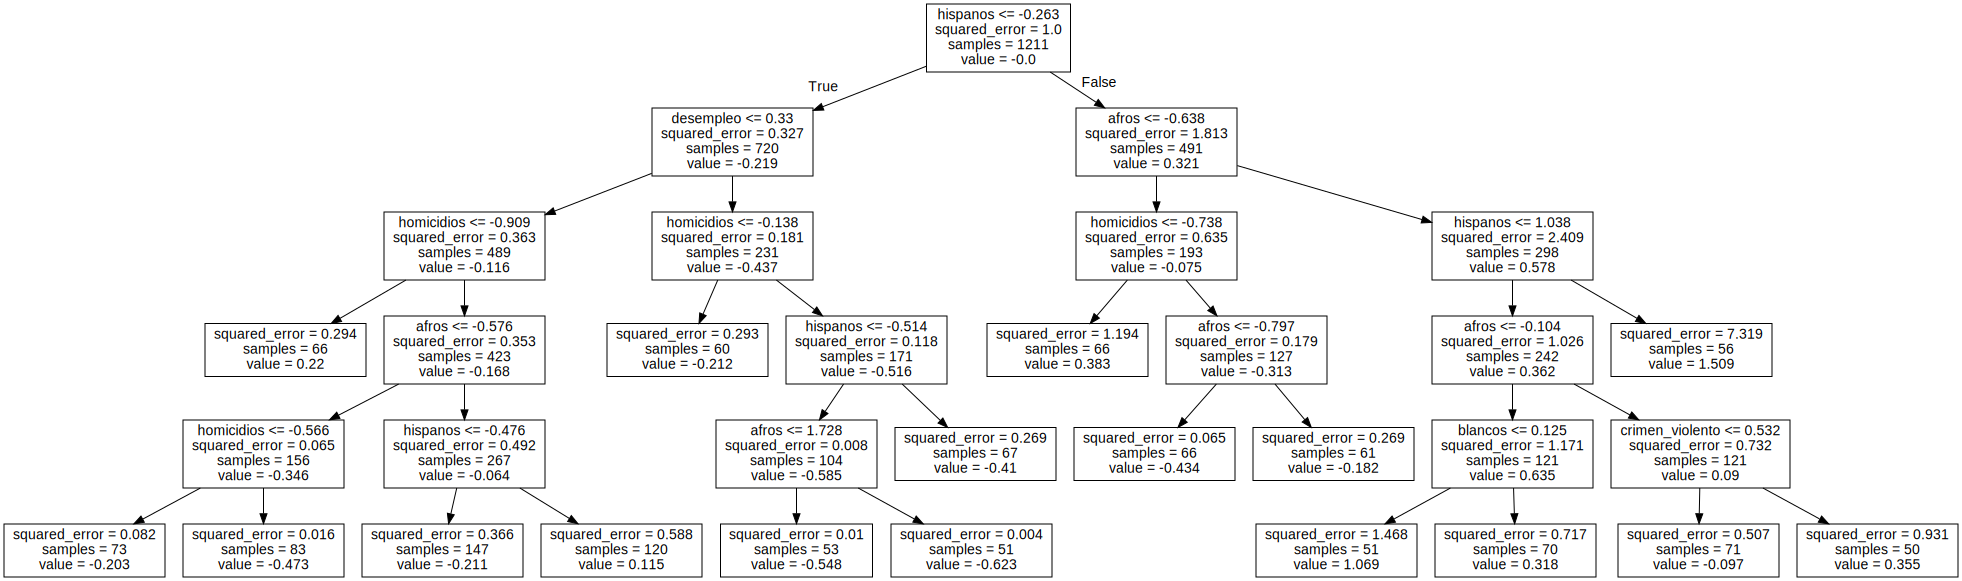

In [ ]:
from sklearn.tree import export_graphviz

#exportamos el arbol creado en archivo dot
export_graphviz(regtree,
                     out_file="regtree.dot",
                     feature_names = predictors)

#cargamos el archivo dot 
file = open("/content/regtree.dot", "r")
text = file.read()

# visualizamos el archivo
import graphviz
graphviz.Source(text)

In [ ]:
#cv = KFold(n_splits =X.shape[0], shuffle=True, random_state=1)
#scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv = cv, n_jobs=1)
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

cv = KFold(n_splits = 10, shuffle=True, random_state=1)
scores = cross_val_score(regtree,X,Y, scoring=make_scorer(mean_squared_error),cv=cv,n_jobs=1)
score = np.mean(scores)
print(round(score,2))


0.85


In [ ]:
sorted(list(zip(regtree.feature_importances_,predictors)),reverse=True)
#Las variables mas importante son hispanos, blancos y afros.

[(0.4998372208551641, 'hispanos'),
 (0.2541671262402835, 'afros'),
 (0.11938139126927727, 'homicidios'),
 (0.05427594199127577, 'blancos'),
 (0.052787974571425145, 'desempleo'),
 (0.019550345072574242, 'crimen_violento')]

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=20000)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=20000, n_jobs=2, oob_score=True)

In [ ]:
votacion["rforest_pred"]= forest.oob_prediction_
votacion[["rforest_pred", "votacion_trump"]]

,rforest_pred,votacion_trump
0,-0.258104,-0.596576
1,-0.431349,-0.527779
2,-0.352618,-0.169135
3,-0.252556,-0.580267
4,-0.518785,-0.622536
...,...,...
1206,-0.156177,-0.279427
1207,-0.545900,-0.600120
1208,-0.511947,-0.520295
1209,-0.112001,-0.285001


In [ ]:
votacion["rforest_error2"] = (votacion["rforest_pred"]-votacion["votacion_trump"])**2
sum(votacion["rforest_error2"])/len(votacion)

0.855897735716243

In [ ]:
#si queremos ver el coeficiente de determinacion
forest.oob_score_

0.1441022642837564

Random Forest para clasificar

In [ ]:
#utilizamos los datos de riesgo de diabetes utilizado anteriormente.
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=1000)
forest.fit(X,Y)

RandomForestClassifier(n_estimators=1000, n_jobs=2, oob_score=True)

In [ ]:
forest.oob_decision_function_

array([[0.00835655, 0.99164345],
       [0.        , 1.        ],
       [0.01676529, 0.98323471],
       ...,
       [0.01154488, 0.98845512],
       [0.        , 1.        ],
       [0.0097586 , 0.9902414 ]])

In [ ]:
forest.oob_score_

0.8905325443786982